In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### loading data
df = pd.read_csv("ER Wait Time Dataset.csv")

In [ ]:
### checking data
print(df.info())
print(df.head())
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Visit ID                            5000 non-null   object
 1   Patient ID                          5000 non-null   object
 2   Hospital ID                         5000 non-null   object
 3   Hospital Name                       5000 non-null   object
 4   Region                              5000 non-null   object
 5   Visit Date                          5000 non-null   object
 6   Day of Week                         5000 non-null   object
 7   Season                              5000 non-null   object
 8   Time of Day                         5000 non-null   object
 9   Urgency Level                       5000 non-null   object
 10  Nurse-to-Patient Ratio              5000 non-null   int64 
 11  Specialist Availability             5000 non-null   int6

,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000
unique,5000,5000,5,5,2,5000,7,4,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,HOSP-1-20240825-0994,PAT-05000,HOSP-2,Riverside Medical Center,Urban,2024-08-25 23:05:40,Monday,Summer,Evening,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Discharged,NaN
freq,1,1,1023,1023,3006,1,768,1281,1725,1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2879,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.238200,3.875000,87.118800,11.704200,24.827000,45.385400,81.916600,NaN,2.771600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200895,3.043292,57.998585,10.437284,24.807994,35.619975,68.084538,NaN,1.424584
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,10.000000,0.000000,1.000000,2.000000,4.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,36.000000,3.000000,6.000000,17.000000,27.000000,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,74.000000,8.000000,16.000000,35.000000,60.000000,NaN,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,6.000000,138.000000,18.000000,36.000000,66.000000,122.000000,NaN,4.000000


In [ ]:
### missing data
df.isnull().sum()

,0
Visit ID,0
Patient ID,0
Hospital ID,0
Hospital Name,0
Region,0
Visit Date,0
Day of Week,0
Season,0
Time of Day,0
Urgency Level,0


In [ ]:
### validate and correct data types
df['visit_date'] = pd.to_datetime(df['visit_date'])
df['total_wait_time'] = pd.to_numeric(df['total_wait_time'],errors='coerce')

KeyError: 'visit_date'

In [ ]:
### outlayers and inconsistentcies
# impossible time intervals
df[df['total_wait_time'] < df['time_to_registration']]

In [ ]:
# unrealistic wait time
df['total_wait_time'] = df['total_wait_time'].clip(upper=1440)

In [ ]:
# invalide traige time
df[~df['time_to_triage'].between(0,130)]

In [ ]:
### quality flages
df['data_flag'] = 'clean'
df.loc[df['total_wait_time'] > 720, 'data_flag'] = 'outlaier_wait'

In [ ]:
### data quality report
summary = {
    "total_rows": len(df),
    "missing_fixed": df.isnull().sum(),
    "outliers_flagged":(df['data_flag'] != 'clean').sum()
}
print(summary)

In [ ]:
### saving cleaned data
df.to_csv("clean_ER.csv", index=False)

In [ ]:
plt.plot(x='day_of_week', y='patient_id')

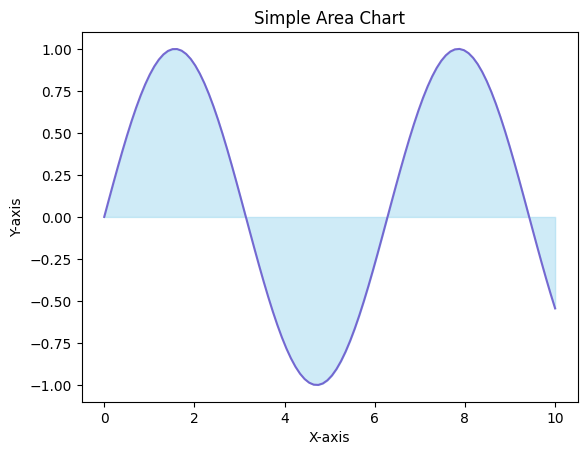

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 1
y = np.sin(x)

# Create area chart
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.plo
            t(x, y, color="Slateblue", alpha=0.9)  # optional line

plt.title("Simple Area Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# New Section